In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
amz_data = pd.read_csv('Amazon Sale Report.csv')

# What percentage of the orders were cancelled?

In [4]:
total_orders = len(amz_data)

# Count the number of cancelled orders
cancelled_orders = amz_data[amz_data['Status'] == 'Cancelled'].shape[0]

# Calculate the percentage of cancelled orders
percentage_cancelled = (cancelled_orders / total_orders) * 100

percentage_cancelled

14.215047760823719

# Which city had the highest number of orders?

In [6]:
city_order_counts = amz_data.groupby('ship-city')['Order ID'].count()

# Find the city with the highest number of orders
city_with_max_orders = city_order_counts.idxmax()
max_orders = city_order_counts.max()
print(f"City with the highest number of orders: {city_with_max_orders} ({max_orders} orders)")

City with the highest number of orders: BENGALURU (11208 orders)


# What is the total revenue generated from all orders?

In [8]:
# Filter out the cancelled orders
non_cancelled_orders = amz_data[amz_data['Status'] != 'Cancelled']

# Calculate the total revenue from non-cancelled orders
total_revenue = non_cancelled_orders['Amount'].sum()
total_revenue

71671747.0

# Determine the state that generated the highest total revenue.

In [10]:
# Group by 'ship_state' and sum the 'Amount' for each state
state_revenue = amz_data.groupby('ship-state')['Amount'].sum()

# Determine the state with the highest total revenue
highest_revenue_state = state_revenue.idxmax()
highest_revenue = state_revenue.max()

print(f"The state that generated the highest total revenue is {highest_revenue_state} with a total revenue of {highest_revenue}")

The state that generated the highest total revenue is MAHARASHTRA with a total revenue of 13340333.05


# Which product category had the most orders?

In [12]:
# Group by product category and count the number of orders
category_order_counts = amz_data.groupby('Category')['Order ID'].count()

# Find the product category with the highest number of orders
category_with_max_orders = category_order_counts.idxmax()
max_orders = category_order_counts.max()
# category_with_max_orders
print(f"Product category with the highest number of orders: {category_with_max_orders} ({max_orders} orders)")

Product category with the highest number of orders: T-shirt (50292 orders)


# How many orders were shipped by the "Easy Ship" method?

In [14]:
# Filter rows where 'fulfilled-by' is 'Easy Ship'
easy_ship_orders = amz_data[amz_data['fulfilled-by'] == 'Easy Ship']

# Count the number of such orders
easy_ship_order_count = easy_ship_orders.shape[0]

print(f"Number of orders shipped by the 'Easy Ship' method: {easy_ship_order_count}")

Number of orders shipped by the 'Easy Ship' method: 39263


# Create a bar plot showing the top 10 orders `ship-state`.

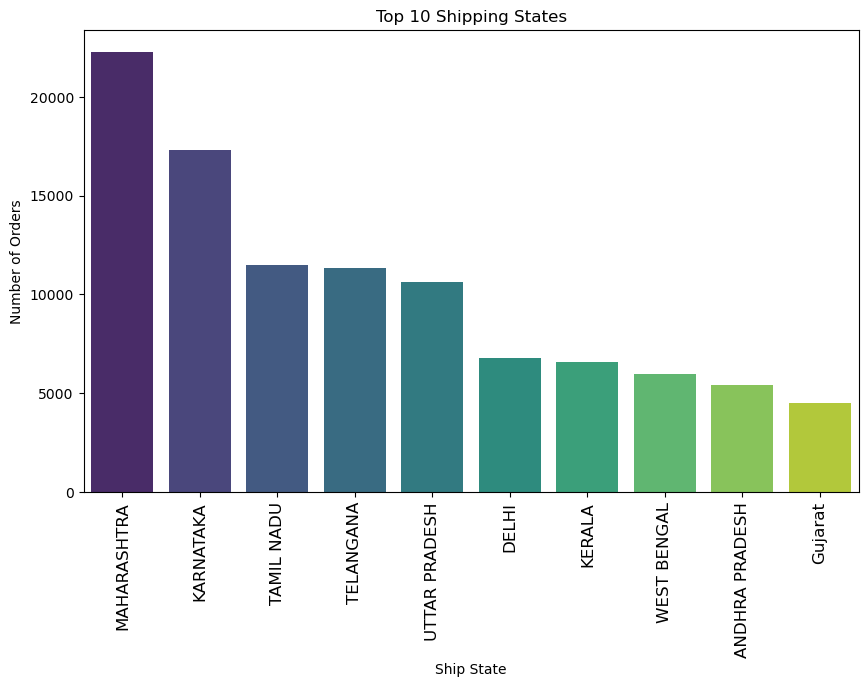

In [16]:
order_counts = amz_data['ship-state'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.xlabel('Ship State')
plt.ylabel('Number of Orders')
plt.title('Top 10 Shipping States')
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()

# Plot a time series of the total `Amount` of sales over time.

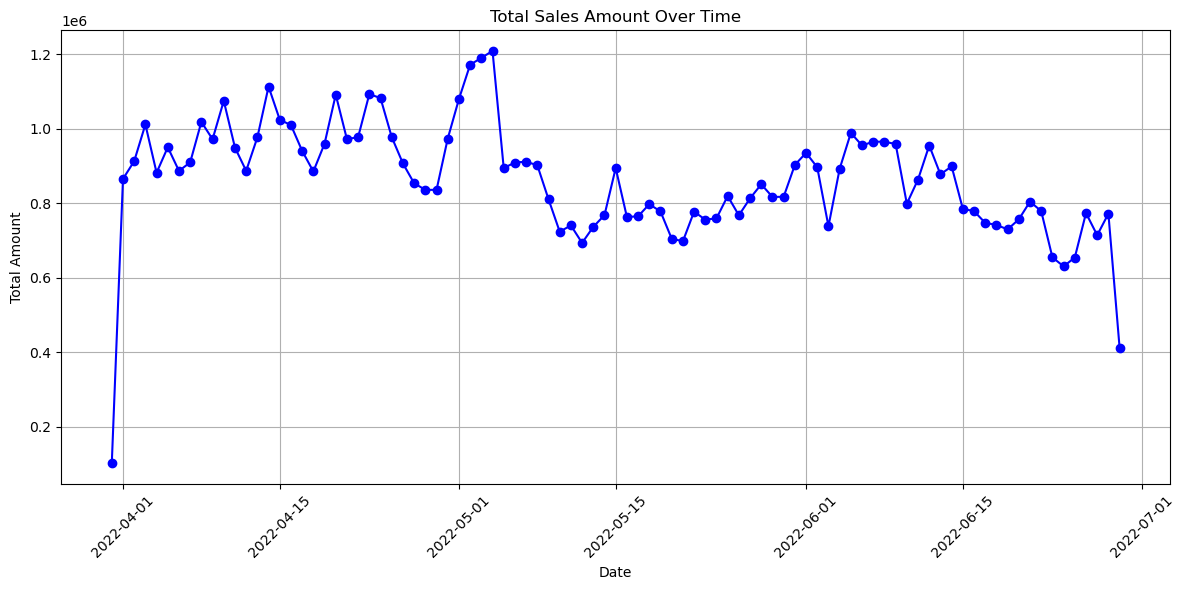

In [18]:
# Convert the 'Date' column to datetime format
amz_data['Date'] = pd.to_datetime(amz_data['Date'])

# Aggregate the 'Amount' by Date
daily_sales = amz_data.groupby('Date')['Amount'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Sales Amount Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Create a pie chart showing the distribution of Fulfilment.


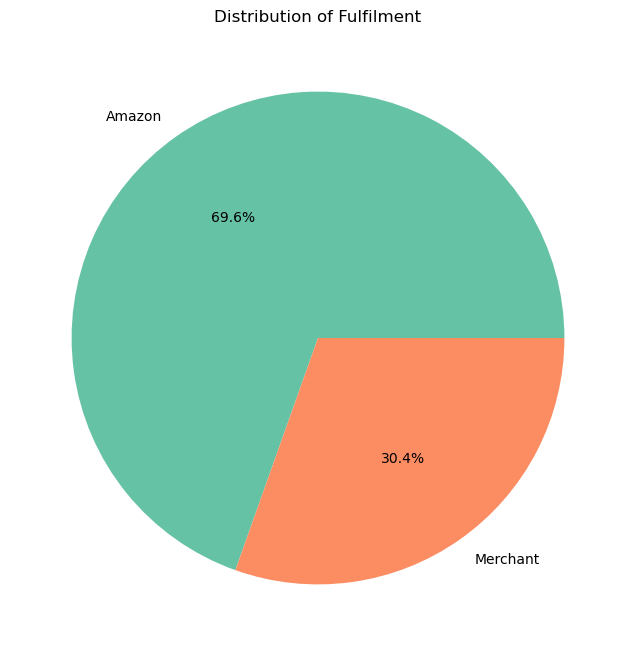

In [20]:
# Count the number of orders per Fulfilment
fulfilment_counts = amz_data['Fulfilment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Fulfilment')
plt.show()

# Generate a scatter plot comparing `Qty` and `Amount`.

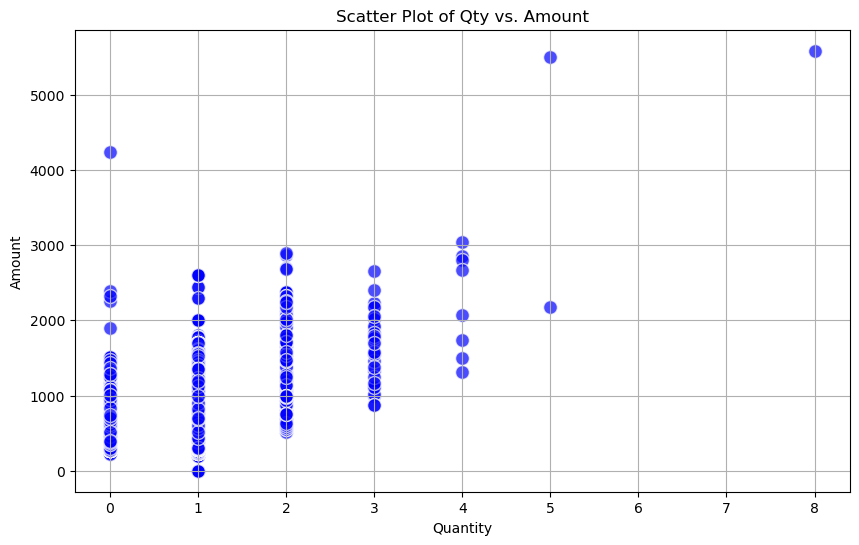

In [22]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(amz_data['Qty'], amz_data['Amount'], color='blue', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.title('Scatter Plot of Qty vs. Amount')
plt.grid(True)
plt.show()

# Visualize the distribution of order `Amount` using a histogram.

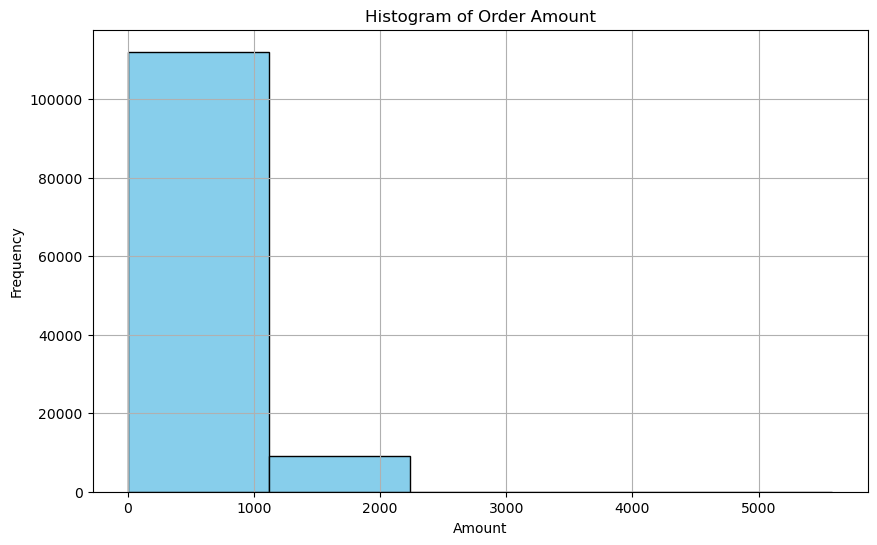

In [24]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(amz_data['Amount'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Order Amount')
plt.grid(True)
plt.show()

# What is the average order `Amount` for orders that were "Shipped - Delivered to Buyer"?


In [26]:
# Filter the DataFrame for orders with status "Shipped - Delivered to Buyer"
delivered_orders = amz_data[amz_data['Status'] == 'Shipped - Delivered to Buyer']

# Calculate the average order amount for these orders
average_amount = delivered_orders['Amount'].mean()

print(f"The average order amount for orders that were 'Shipped - Delivered to Buyer' is: {average_amount}")

The average order amount for orders that were 'Shipped - Delivered to Buyer' is: 648.475824405176


# Identify the most common `Size` ordered for each `Category`.

In [28]:
# Find the most common Size for each Category
most_common_size = amz_data.groupby('Category')['Size'].agg(lambda x: x.mode()[0])

print(most_common_size)

Category
Blazzer        L
Perfume     Free
Shirt          L
Shoes       Free
Socks          S
T-shirt        M
Trousers      XL
Wallet      Free
Watch       Free
Name: Size, dtype: object


# How many orders were fulfilled by the merchant compared to Amazon?

In [30]:
amz_data.groupby(['Fulfilment']).size().reset_index(name='Count')

,Fulfilment,Count
0,Amazon,89713
1,Merchant,39263


# What is the average `Amount` of orders shipped with the "Expedited" service level?

In [32]:
# Filter the DataFrame for orders with the "Expedited" service level
expedited_orders = amz_data[amz_data['ship-service-level'] == 'Expedited']

# Calculate the average order amount for these orders
average_amount_expedited = expedited_orders['Amount'].mean()

print(f"The average order amount for orders shipped with the 'Expedited' service level is: {average_amount_expedited}")

The average order amount for orders shipped with the 'Expedited' service level is: 656.2212660002659


# Create a box plot to compare the distribution of `Amount` between orders fulfilled by the merchant and Amazon.

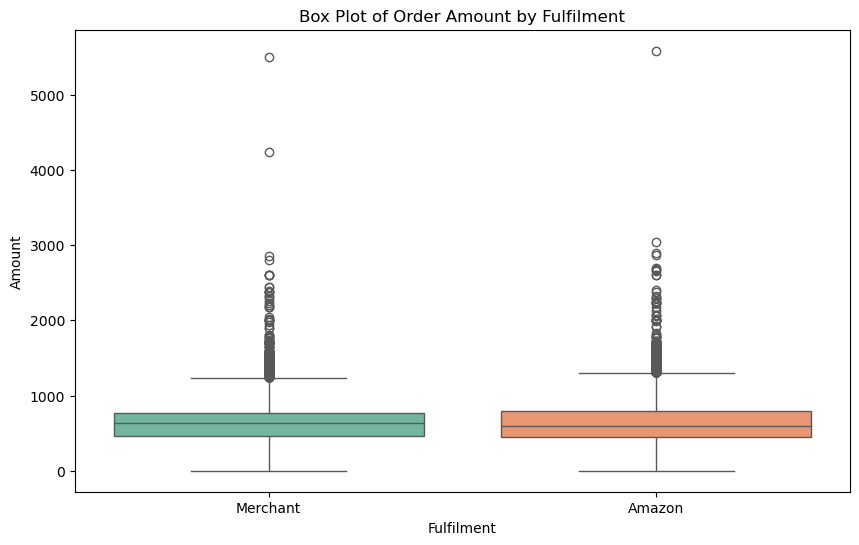

In [34]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fulfilment', y='Amount', data=amz_data, palette='Set2')
plt.xlabel('Fulfilment')
plt.ylabel('Amount')
plt.title('Box Plot of Order Amount by Fulfilment')
plt.show()